In [1]:
import torch
from toy import Toy2D_Task1, Toy2D_Task2, Toy2D_Task3, Toy2D_Task4
from base import train
from ddn import DDN

EPOCHS = 500
BATCH_SIZE = 256
LR = 3e-4
TRAIN_SIZE = 2000
device = torch.device('cuda')

In [2]:
dataset = Toy2D_Task1()
X, Y = dataset.sample(TRAIN_SIZE)
targets_range = [(-10, 10), (-10, 10)]

In [3]:
net = DDN(
    num_perm=2, 
    condition_dim=1, 
    target_dim=2, 
    target_range_list=targets_range, 
    codes=16, 
    channels=4, 
    width=4, 
    beta=0.025, 
    estimator_channels_list=[32, 16],
    scale_factor=4
)
 
train(net, X, Y, device, EPOCHS, BATCH_SIZE, LR)

100%|██████████| 500/500 [02:09<00:00,  3.86it/s]


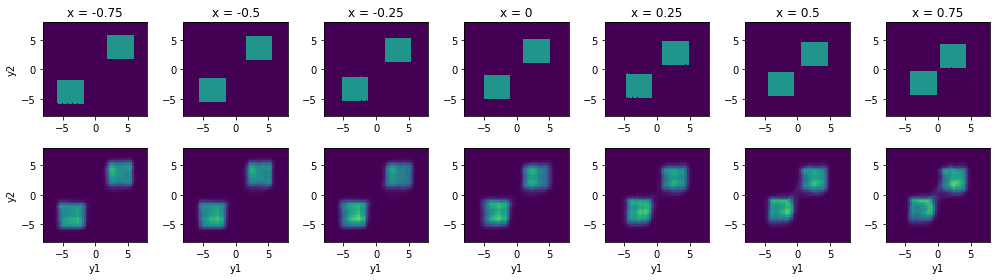

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

x = torch.linspace(-1, 1, 100)
y = torch.linspace(-8, 8, 64)
y1, y2 = torch.meshgrid([y, y])
y = torch.vstack([y1.flatten(), y2.flatten()]).T
fig = plt.figure(figsize=(14, 4))
conditions = torch.tensor([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75]).unsqueeze(-1)
y = y.to(device)
for i, x in enumerate(conditions):
    x = x.reshape(1, 1).expand(4096, -1).to(device)
    gt_ax = fig.add_subplot(2, 7, i + 1)
    net_ax = fig.add_subplot(2, 7, 7 + i + 1)
    gt_ax.set_title('x = %g' % x[0])
    ground_truth = dataset.ygivenx_pdf(x, y).reshape(64, 64).cpu()
    probs = net.conditional_logprobs(x, y).exp().reshape(64, 64).cpu()
    gt_ax.pcolor(y1, y2, ground_truth, vmin=0, vmax=0.06)
    net_ax.pcolor(y1, y2, probs, vmin=0, vmax=0.06)
    if i == 0:
        gt_ax.set_ylabel('y2')
        net_ax.set_ylabel('y2')
    net_ax.set_xlabel('y1')
plt.tight_layout()
plt.show()

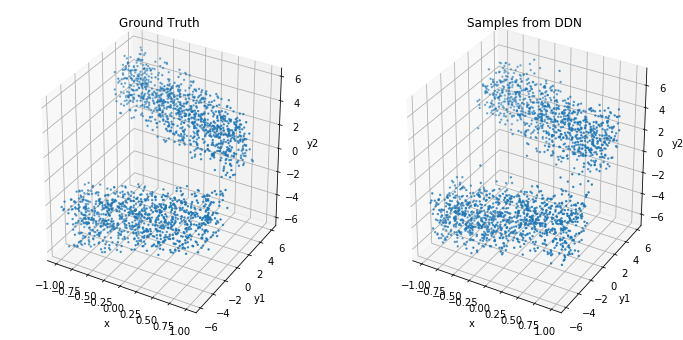

In [10]:
x = torch.rand_like(X) * 2 - 1
samples = net.sample(x.to(device)).cpu()

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1, projection='3d')
ax.set_title('Ground Truth')
ax.scatter(X, Y[:, 0], Y[:, 1], s=2)
ax.set_xlabel('x')
ax.set_ylabel('y1')
ax.set_zlabel('y2')

ax2 = plt.subplot(1, 2, 2, projection='3d')
ax2.set_title('Samples from DDN')
ax2.scatter(x.cpu(), samples[:, 0], samples[:, 1], s=2)
ax2.set_xlabel('x')
ax2.set_ylabel('y1')
ax2.set_zlabel('y2')


plt.show() 